# Load the data file income.csv and explore the data, showing size, and data distributions

In [1]:
# Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Variables
file_name = 'income.csv'
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

df = pd.read_csv(file_name)
print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))
df.describe()

There are 7891 rows and 11 columns


,Unnamed: 0,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
count,7891.00000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7.891000e+03
mean,3945.00000,0.436320,1503.934989,682.607528,1514.311367,1141.186668,112.176403,85.558738,39.987961,1.094664e+08
std,2278.07982,7.708889,8019.878927,3173.115435,6818.879697,7609.469415,1152.192290,978.254230,588.108958,7.821773e+08
min,0.00000,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.388280e+05
25%,1972.50000,0.000000,226.000000,109.000000,207.000000,112.000000,7.000000,4.000000,0.000000,1.193600e+07
50%,3945.00000,0.000000,525.000000,253.000000,520.000000,309.000000,21.000000,14.000000,5.000000,3.099277e+07
75%,5917.50000,0.000000,1256.000000,600.000000,1347.000000,876.500000,68.000000,46.000000,20.000000,8.517508e+07
max,7890.00000,456.000000,540724.000000,205064.000000,413523.000000,520285.000000,78473.000000,66290.000000,35644.000000,5.130494e+10


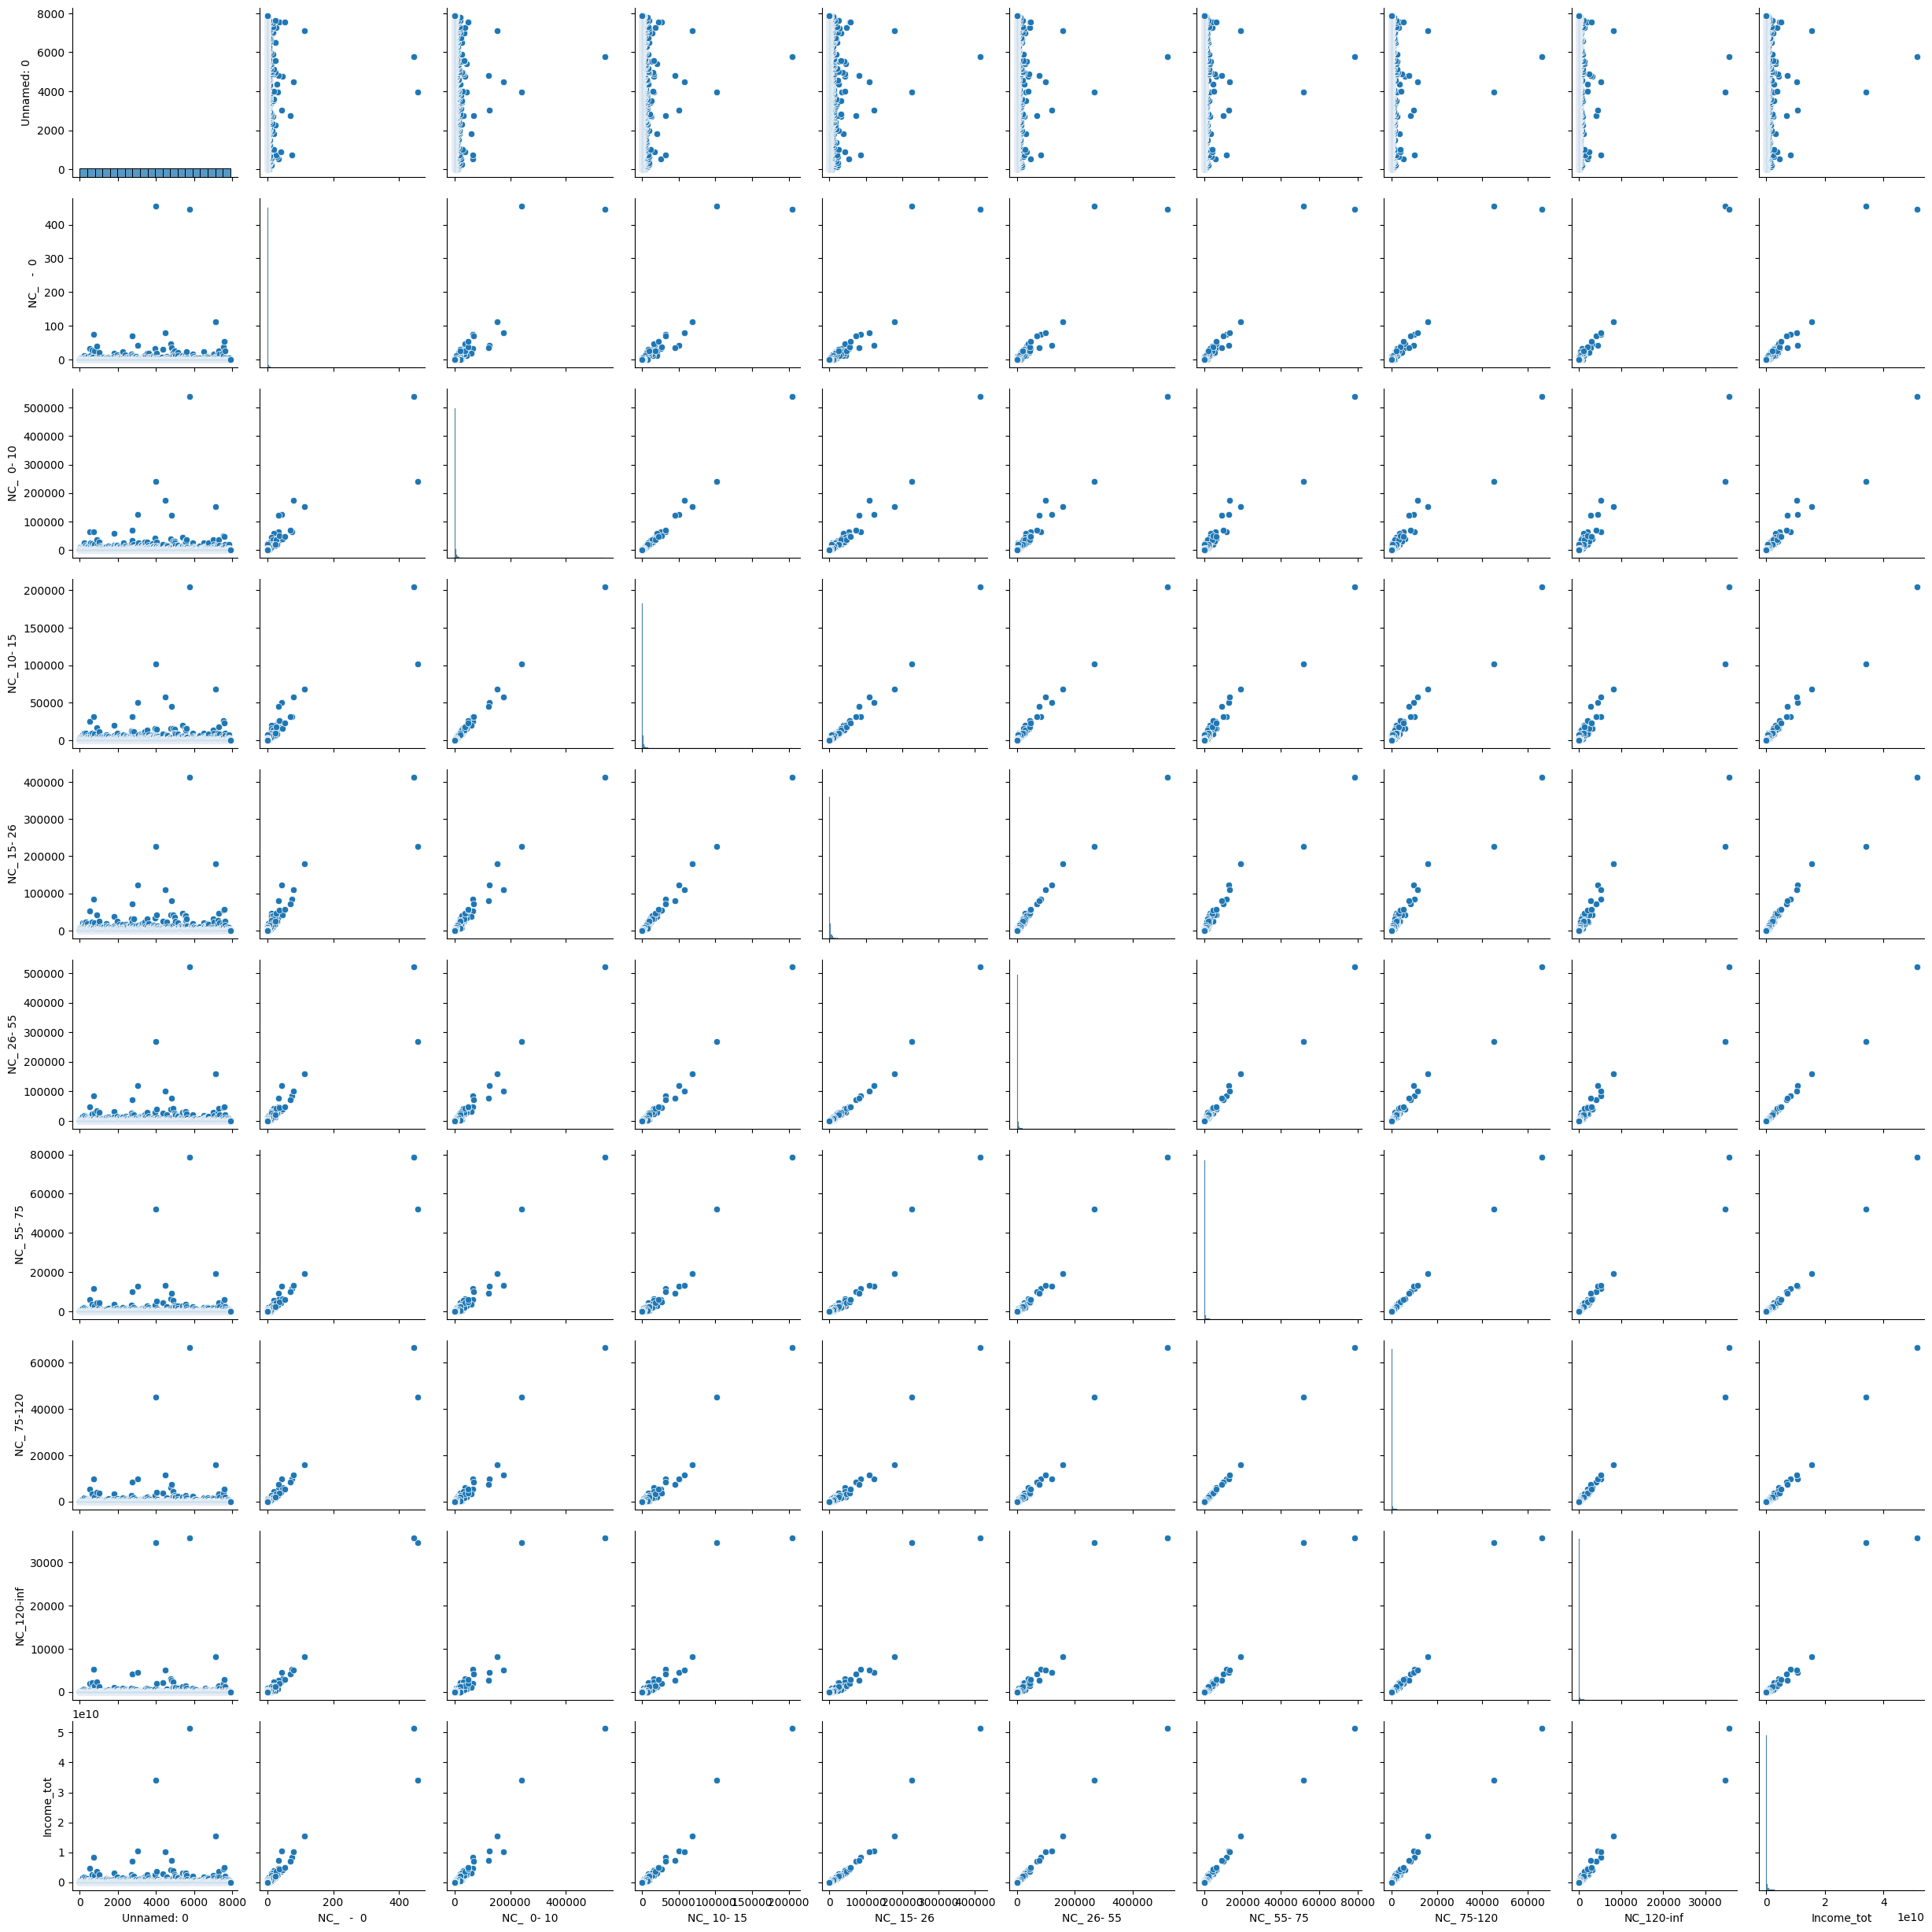

In [2]:
sns.pairplot(df)

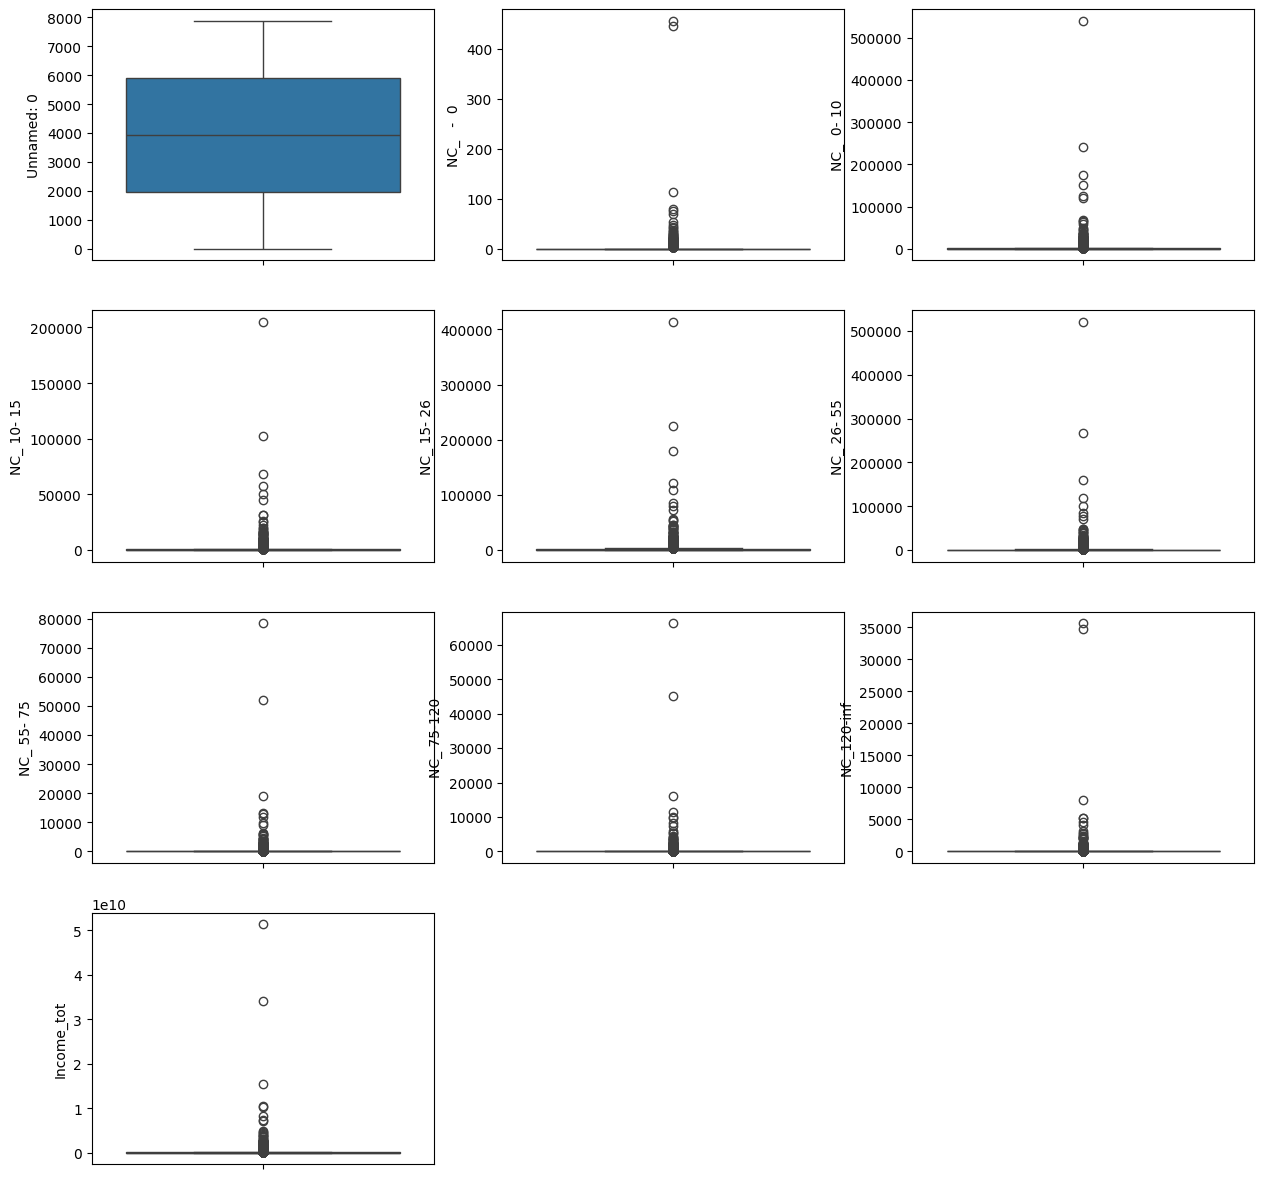

In [3]:
#--Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns:
        if(type(df[i][0]) != str):
                plt.subplot(4, 3, pos)
                sns.boxplot(df[i])
                pos += 1

# drop the columns that are not relevant for the clustering operation, if any, and explain why you do that

<Axes: >

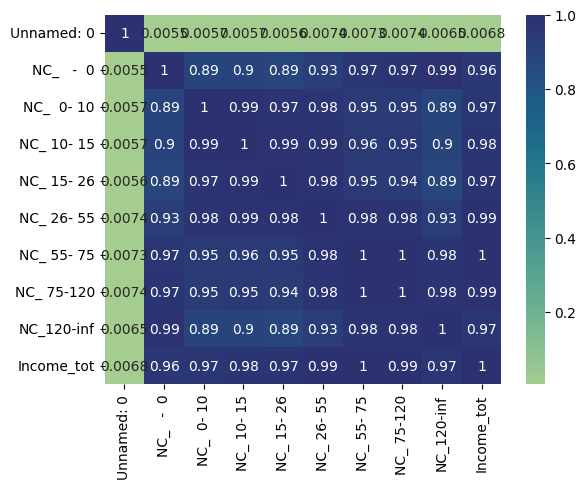

In [13]:
dfclean= df.drop(['Territorio'], axis=1)
corr_mat = dfclean.corr()
sns.heatmap(corr_mat, cmap='crest', annot=True)



## drop Territorio cause there' no data
## drop first col cause it's a idx
## drop income_tot cause it's correlated with everything
## drop NC_ 55- 75 cause it's correlated with everything

<Axes: >

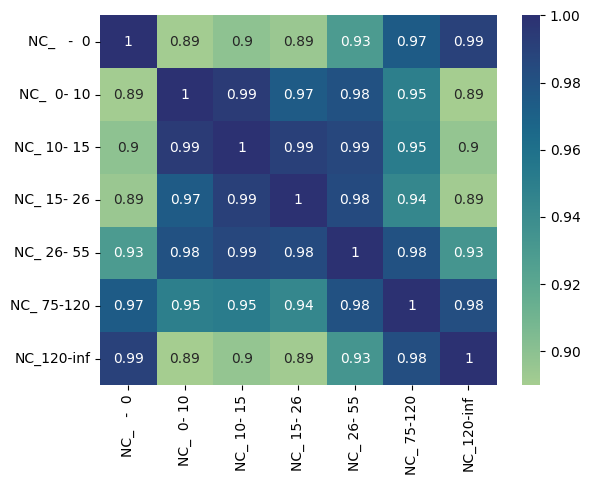

In [14]:
dfclean= dfclean.drop(['Income_tot', 'Unnamed: 0', 'NC_ 55- 75'], axis=1)
corr_mat = dfclean.corr()
sns.heatmap(corr_mat, cmap='crest', annot=True)